In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'

df = pd.read_csv(url)

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
print(df.isnull().sum())  

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [6]:
bill_length_mm = df['bill_length_mm'].mean()  
df['bill_length_mm'] = df['bill_length_mm'].fillna(bill_length_mm)

In [7]:
bill_depth_mm = df['bill_depth_mm'].mean()  
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(bill_depth_mm)

In [8]:
flipper_length_mm = df['flipper_length_mm'].mean()  
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(flipper_length_mm)

In [9]:
body_mass_g = df['body_mass_g'].mean()  
df['body_mass_g'] = df['body_mass_g'].fillna(body_mass_g)

In [10]:
print(df.isnull().sum())  

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64


In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['island']  

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head()) 

  species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie       2        39.10000       18.70000         181.000000   
1  Adelie       2        39.50000       17.40000         186.000000   
2  Adelie       2        40.30000       18.00000         195.000000   
3  Adelie       2        43.92193       17.15117         200.915205   
4  Adelie       2        36.70000       19.30000         193.000000   

   body_mass_g     sex  
0  3750.000000    MALE  
1  3800.000000  FEMALE  
2  3250.000000  FEMALE  
3  4201.754386     NaN  
4  3450.000000  FEMALE  


In [19]:
X=df.drop(['species', 'sex'],axis=1)
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,2,39.10000,18.70000,181.000000,3750.000000
1,2,39.50000,17.40000,186.000000,3800.000000
2,2,40.30000,18.00000,195.000000,3250.000000
3,2,43.92193,17.15117,200.915205,4201.754386
4,2,36.70000,19.30000,193.000000,3450.000000


In [20]:
y = df['species']
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [21]:
Y = pd.get_dummies(y).values

Y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       ...,
       [False, False,  True],
       [False, False,  True],
       [False, False,  True]])

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((275, 5), (275, 3), (69, 5), (69, 3))

c:\Users\syjwk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,023 (35.25 KB)

 Trainable params: 9,023 (35.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.2589 - loss: 5.4813 - val_accuracy: 0.5362 - val_loss: 1.2519
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4676 - loss: 1.7319 - val_accuracy: 0.4928 - val_loss: 1.1773
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3863 - loss: 1.4953 - val_accuracy: 0.3623 - val_loss: 1.0577
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3978 - loss: 1.3729 - val_accuracy: 0.3623 - val_loss: 1.8929
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4621 - loss: 1.3042 - val_accuracy: 0.4928 - val_loss: 0.9935
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4330 - loss: 1.0968 - val_accuracy: 0.3623 - val_loss: 1.1808
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3827 - loss: 1.2439 - val_accuracy: 0.4928 - val_loss: 1.0577
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3763 - loss: 1.1588 - val_accuracy: 0.7246 - val_loss: 0.9534
Epoch

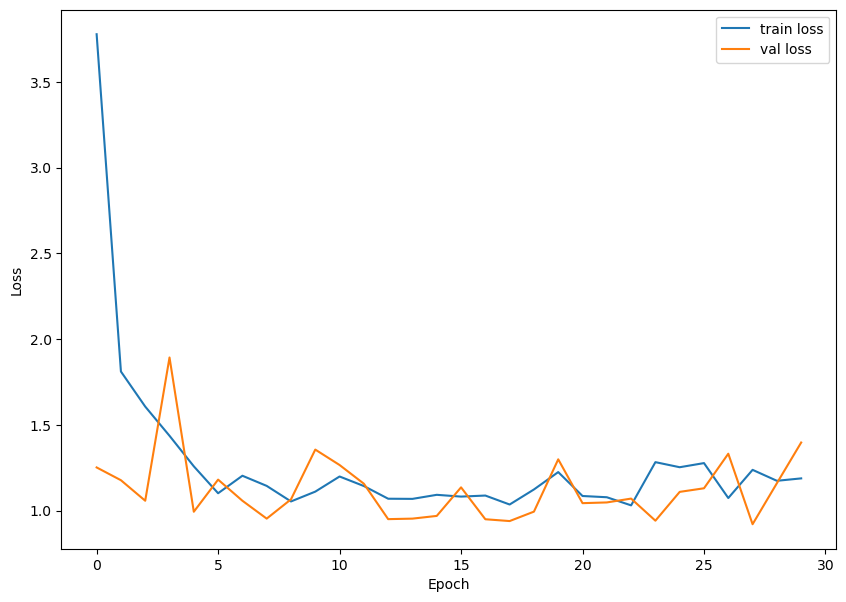

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(5,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

# model.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

plt.figure(figsize=(10,7))
epochs = len(model_history.history['loss'])
plt.plot(range(epochs), model_history.history['loss'], label='train loss')
plt.plot(range(epochs), model_history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5003 - loss: 1.3935


[1.3971797227859497, 0.49275362491607666]